## Homework #5
#### Author: `<Anastasiia> <Krzheshevska>`
#### Total time spent on h/w (in minutes): `<1200+>`

In [98]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import ast
import re
import emoji as emojilib

sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(12, 10)})
plt.rc('axes', unicode_minus=False)

In [9]:
DIALOGS_MERGED_DATA_PATH = "C:/data/merged_data/dialogs_data_all.csv"
DIALOGS_META_MERGED_DATA_PATH = "C:/data/merged_data/dialogs_users_all.csv"

In [10]:
df1 = pd.read_csv(DIALOGS_MERGED_DATA_PATH)
df2 = pd.read_csv(DIALOGS_META_MERGED_DATA_PATH)

C:\Users\Anastasija\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [11]:
df1.head(3)

,id,date,from_id,to_id,fwd_from,message,type,duration,dialog_id
0,896,2022-02-22 13:10:49+00:00,NaN,PeerChannel(channel_id=1121077046),NaN,NaN,text,NaN,-1001121077046
1,895,2022-02-22 13:10:41+00:00,NaN,PeerChannel(channel_id=1121077046),NaN,​​Твоя тривога має місце бути.\n\nМи справді н...,photo,NaN,-1001121077046
2,894,2022-02-21 15:50:55+00:00,NaN,PeerChannel(channel_id=1121077046),NaN,NaN,photo,NaN,-1001121077046


In [12]:
df2.head(3)

,dialog_id,name,type,users
0,-1001157055007,Украшения,Channel,"{'user_id': 564960030, 'first_name': 'Анастаси..."
1,-1001166945561,Музыка,Channel,"{'user_id': 872142485, 'first_name': 'Мама', '..."
2,-1001166945561,Музыка,Channel,"{'user_id': 564960030, 'first_name': 'Анастаси..."


In [13]:
df = df1.append(df2)

In [14]:
df.head(12)

,id,date,from_id,to_id,fwd_from,message,type,duration,dialog_id,name,users
0,896.0,2022-02-22 13:10:49+00:00,NaN,PeerChannel(channel_id=1121077046),NaN,NaN,text,NaN,-1001121077046,NaN,NaN
1,895.0,2022-02-22 13:10:41+00:00,NaN,PeerChannel(channel_id=1121077046),NaN,​​Твоя тривога має місце бути.\n\nМи справді н...,photo,NaN,-1001121077046,NaN,NaN
2,894.0,2022-02-21 15:50:55+00:00,NaN,PeerChannel(channel_id=1121077046),NaN,NaN,photo,NaN,-1001121077046,NaN,NaN
3,893.0,2022-02-14 13:10:05+00:00,NaN,PeerChannel(channel_id=1121077046),NaN,"​​​​Можливо, ти сьогодні пішов на пари чи робо...",photo,NaN,-1001121077046,NaN,NaN
4,892.0,2022-02-14 10:30:06+00:00,NaN,PeerChannel(channel_id=1121077046),NaN,NaN,photo,NaN,-1001121077046,NaN,NaN
5,891.0,2022-02-12 14:00:04+00:00,NaN,PeerChannel(channel_id=1121077046),NaN,​​Маєш пару на 14-те?\n\nЧи ти та сама людинка...,photo,NaN,-1001121077046,NaN,NaN
6,890.0,2022-02-10 10:00:04+00:00,NaN,PeerChannel(channel_id=1121077046),NaN,"​​​​Любов варта всього, пам'ятаєш же?\n\nМи ві...",photo,NaN,-1001121077046,NaN,NaN
7,889.0,2022-02-07 12:00:19+00:00,NaN,PeerChannel(channel_id=1121077046),NaN,NaN,photo,NaN,-1001121077046,NaN,NaN
8,888.0,2022-02-03 10:00:10+00:00,NaN,PeerChannel(channel_id=1121077046),NaN,"​​Могилянка — твоя, моя, наша спільна — повсяк...",photo,NaN,-1001121077046,NaN,NaN
9,887.0,2022-01-31 07:01:01+00:00,NaN,PeerChannel(channel_id=1121077046),NaN,NaN,photo,NaN,-1001121077046,NaN,NaN


#### Data in relation to dates and times

In [60]:
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month
df['day'] = pd.DatetimeIndex(df['date']).day
df['hour'] = pd.DatetimeIndex(df['date']).hour

In [61]:

df['hour'] = df["hour"].dropna().astype("int")
df['day'] = df["day"].dropna().astype("int")
df['month'] = df["month"].dropna().astype("int")
df['year'] = df["year"].dropna().astype("int")

In [17]:
df.head(3)

,id,date,from_id,to_id,fwd_from,message,type,duration,dialog_id,name,users,year,month,day,hour
0,896.0,2022-02-22 13:10:49+00:00,NaN,PeerChannel(channel_id=1121077046),NaN,NaN,text,NaN,-1001121077046,NaN,NaN,2022,2,22,13
1,895.0,2022-02-22 13:10:41+00:00,NaN,PeerChannel(channel_id=1121077046),NaN,​​Твоя тривога має місце бути.\n\nМи справді н...,photo,NaN,-1001121077046,NaN,NaN,2022,2,22,13
2,894.0,2022-02-21 15:50:55+00:00,NaN,PeerChannel(channel_id=1121077046),NaN,NaN,photo,NaN,-1001121077046,NaN,NaN,2022,2,21,15


In [18]:
df2["users"] = df2.users.apply(lambda x: ast.literal_eval(x))
df2[['user_id', 'first_name', "last_name", "username", "phone"]] = df2['users'].apply(pd.Series)
df2.drop("users", axis=1, inplace=True)

In [19]:
df2.head(3)

,dialog_id,name,type,user_id,first_name,last_name,username,phone
0,-1001157055007,Украшения,Channel,564960030,Анастасия,Кржешевская,kryzhikk,380675093869
1,-1001166945561,Музыка,Channel,872142485,Мама,None,Krzeshevska,380672497021
2,-1001166945561,Музыка,Channel,564960030,Анастасия,Кржешевская,kryzhikk,380675093869


### Users in different chats with me

C:\Users\Anastasija\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


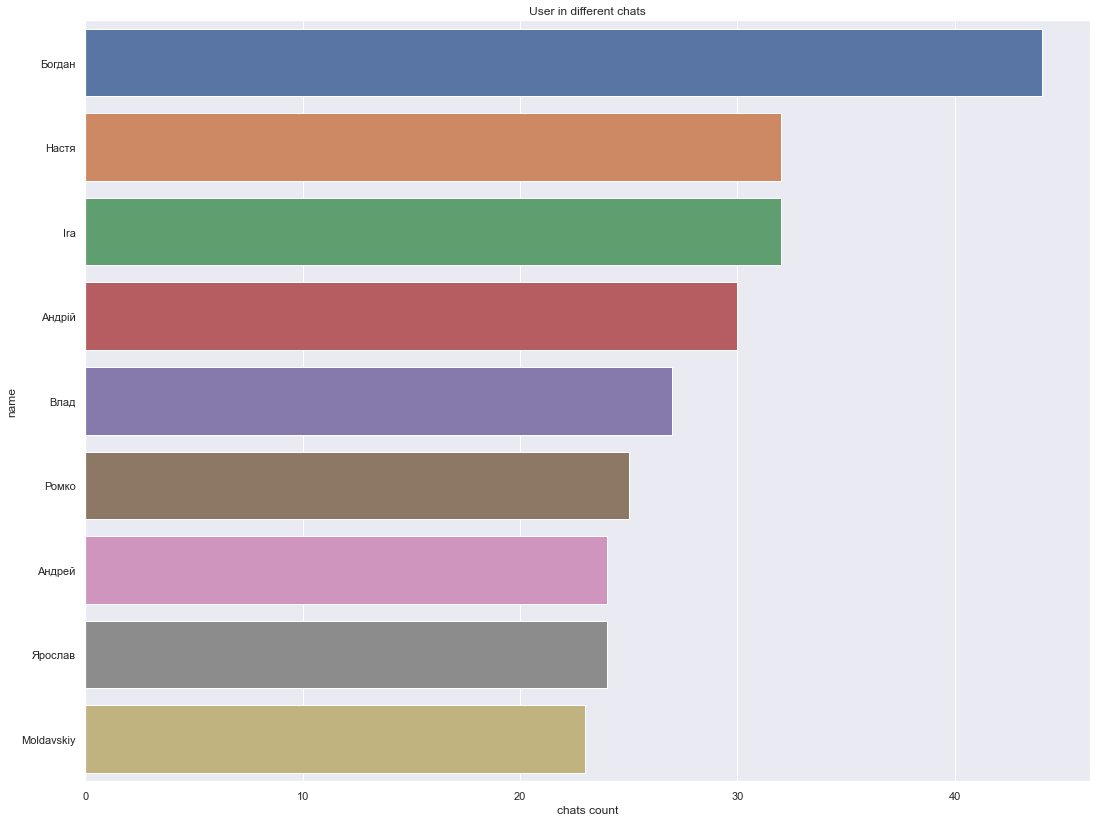

In [81]:
query16 = df2.groupby(["first_name"]).count().sort_values("name", ascending=False)["name"][1:10]
ax = sns.barplot(query16.values, query16.index)
ax.set_title("User in different chats")
ax.set(xlabel='chats count', ylabel='name')
plt.show()

### Messeges in private chat with me by time

C:\Users\Anastasija\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


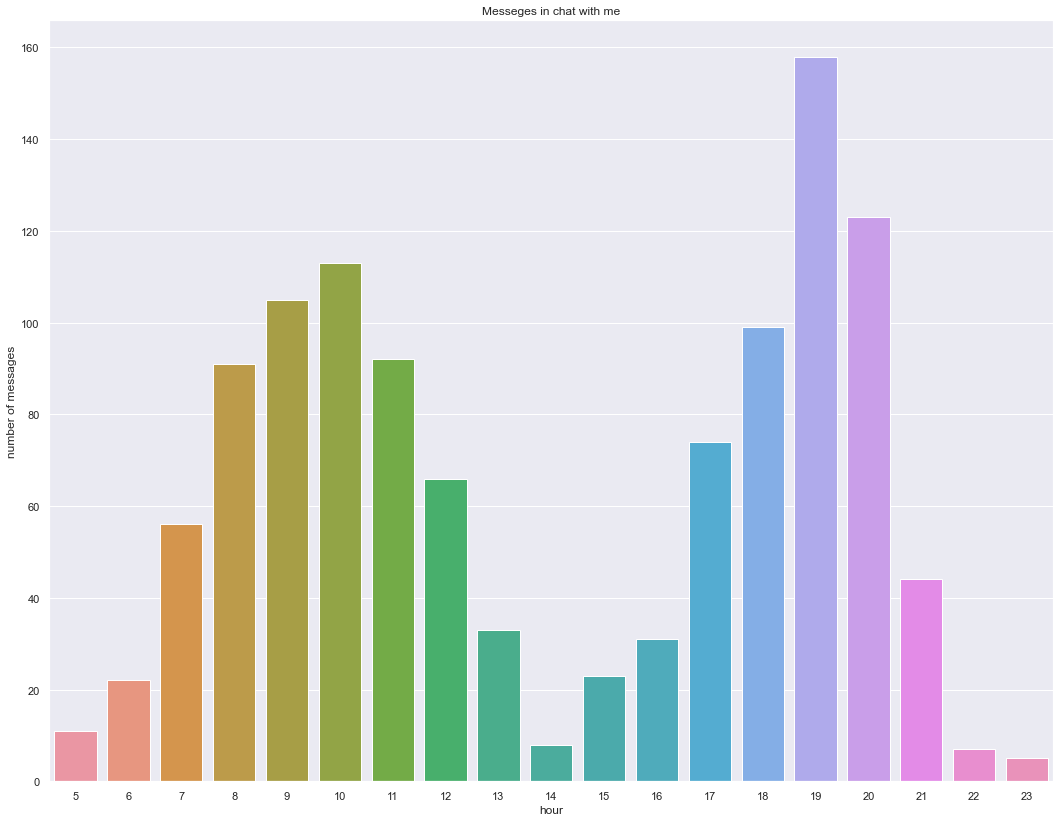

In [74]:
query17 = df[df["to_id"] == "564960030"].groupby("hour").count()["id"]
ax = sns.barplot(query17.index, query17.values)
ax.set_title("Messeges in chat with me")
ax.set(xlabel='hour', ylabel='number of messages')
plt.show()

### Top chats by people

C:\Users\Anastasija\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Anastasija\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 129533 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Anastasija\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 129699 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Anastasija\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 127775 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Anastasija\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 127873 missing f

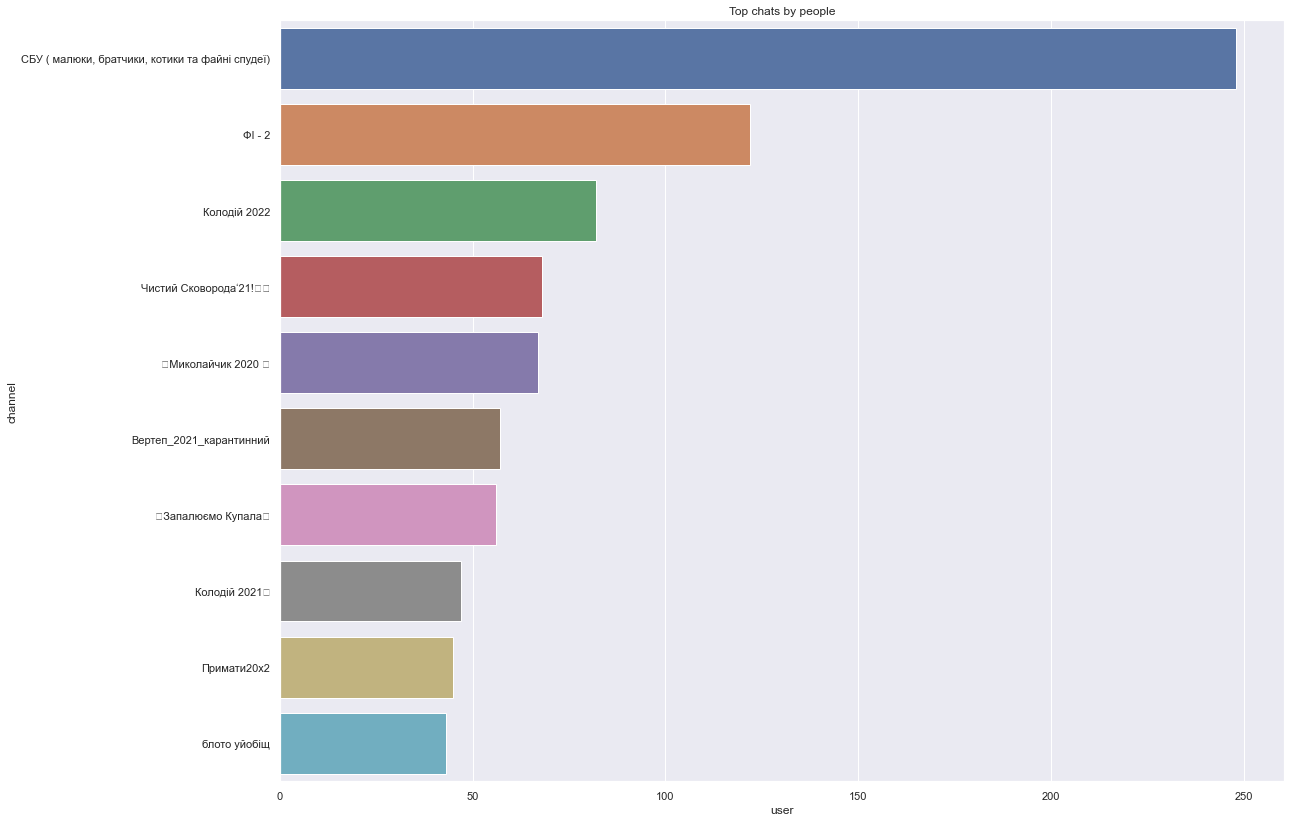

In [78]:
query25 = df2.groupby("name").count()["dialog_id"].sort_values(ascending=False)[:10]
ax = sns.barplot(query25.values, query25.index)
ax.set(xlabel='user', ylabel='channel')
ax.set_title("Top chats by people")
plt.show()

### Top words 

C:\Users\Anastasija\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


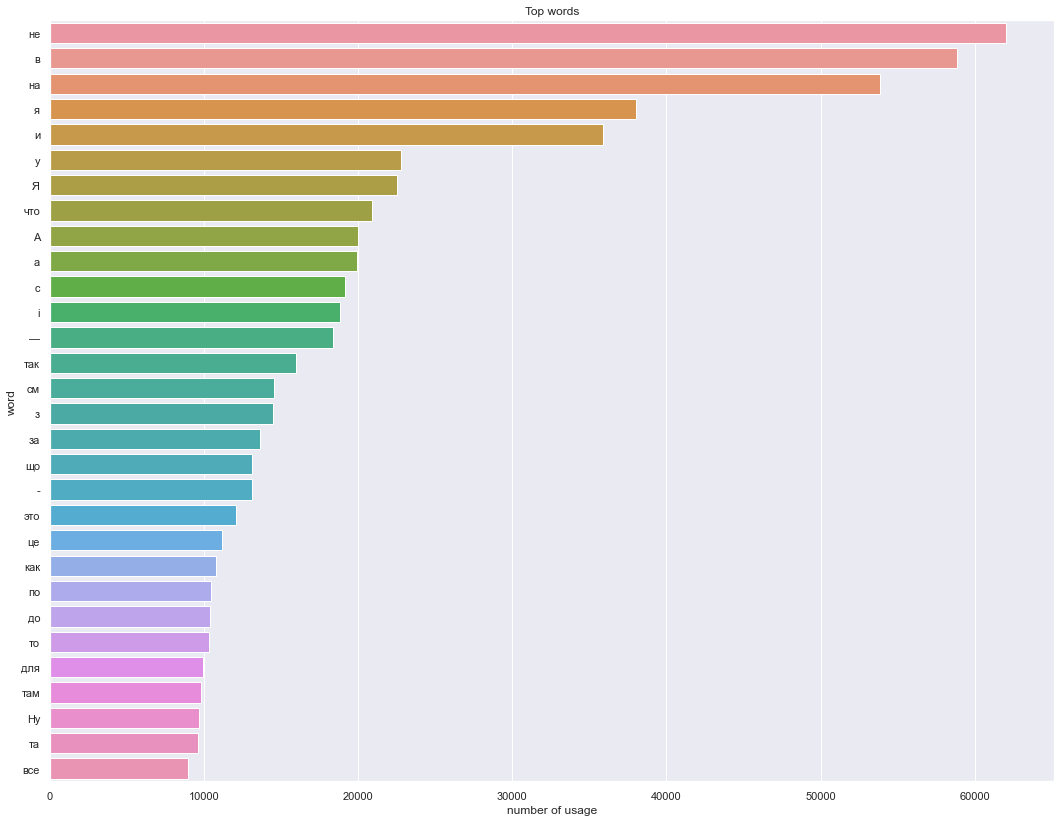

In [87]:
query20 = Counter(" ".join(df1[~df1["message"].isna()]["message"]).split()).most_common(30)
query20id, query20values = zip(*query20)
query20 = pd.Series(query20id, query20values)
ax = sns.barplot(query20.index, query20.values)
ax.set(xlabel='number of usage', ylabel='word')
ax.set_title("Top words")
plt.show()

In [90]:
query21 = query20[query21.str.len() > 4][:30]
ax = sns.barplot(query21.index, query21.values)
ax.set(xlabel='number of usage', ylabel='word')
ax.set_title("Top words (Length > 4)")
plt.show()

ValueError: cannot reindex from a duplicate axis

### Top stickers

C:\Users\Anastasija\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


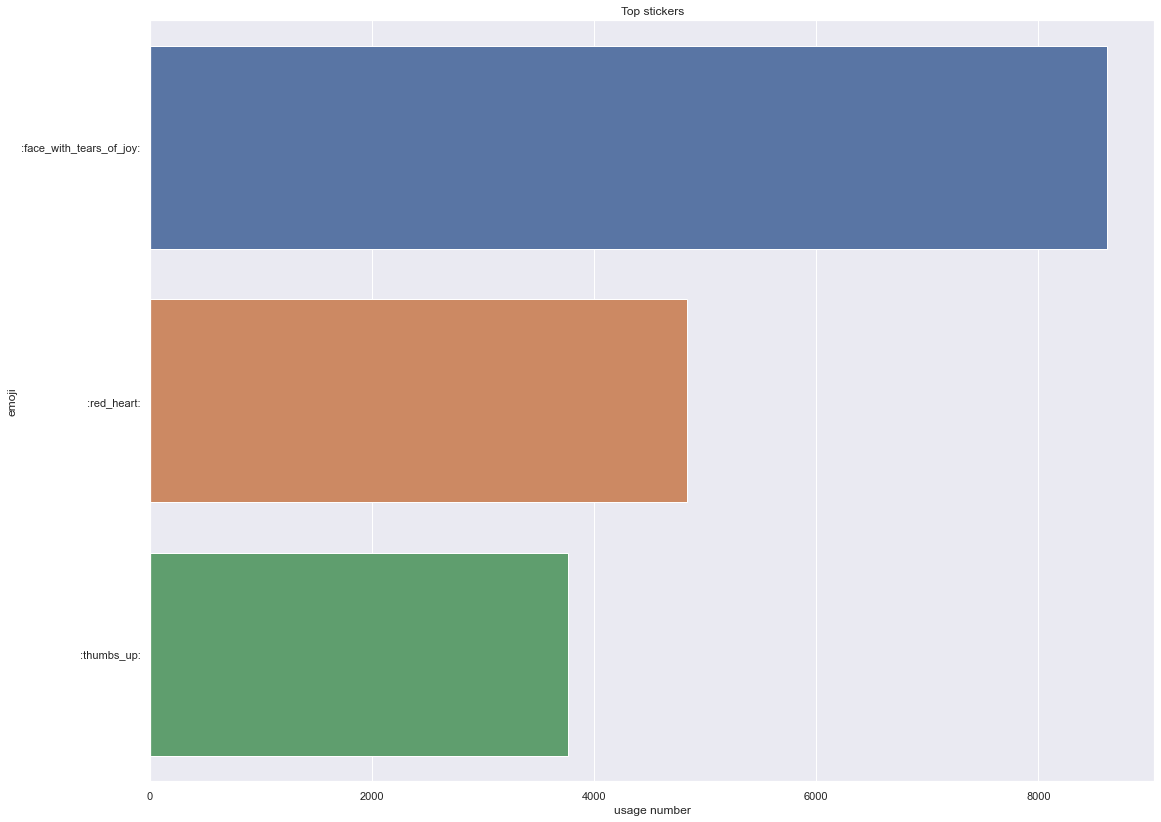

In [94]:
text_emoji_list = ["–", "’", "•", "—", " "]
query18 = dict()
for i in df1['message']:
    for emoji_text in re.findall(u'[\U0001f300-\U0001f650]|[\u2000-\u3000]', str(i)):
        if (emoji_text in query18):
            query18[emoji_text] += 1
        else:
            query18[emoji_text] = 1
        
query18 = pd.Series(query18).sort_values(ascending=False)[:4]
query18 = query18[~query18.index.isin(text_emoji_list)]
query18 = pd.Series(query18.index, index=query18.values)
query18 = query18.apply(lambda x: emojilib.demojize(x))
ax = sns.barplot(query18.index, query18.values)
ax.set_title("Top stickers")
ax.set(xlabel='usage number', ylabel='emoji')
plt.show()

#### Mean length of message per time

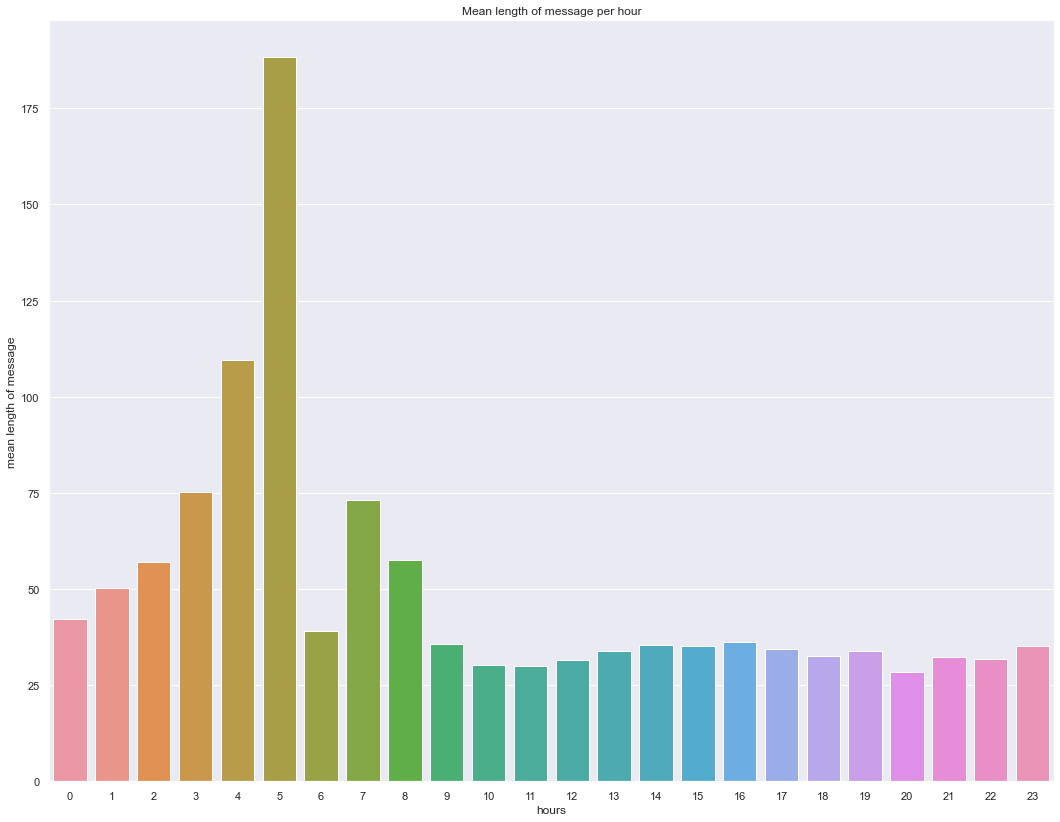

In [25]:
query1 = (df.groupby('hour')['message'].apply(lambda x: np.mean(x.str.len())).reset_index(name='mean_len_message'))
query1["mean_len_message"] = query1["mean_len_message"].round(2)
plot = sns.barplot(x=query1["hour"], y=query1["mean_len_message"])
plot.set(xlabel="hours", ylabel="mean length of message")
plot.set_title('Mean length of message per hour')
plt.show()

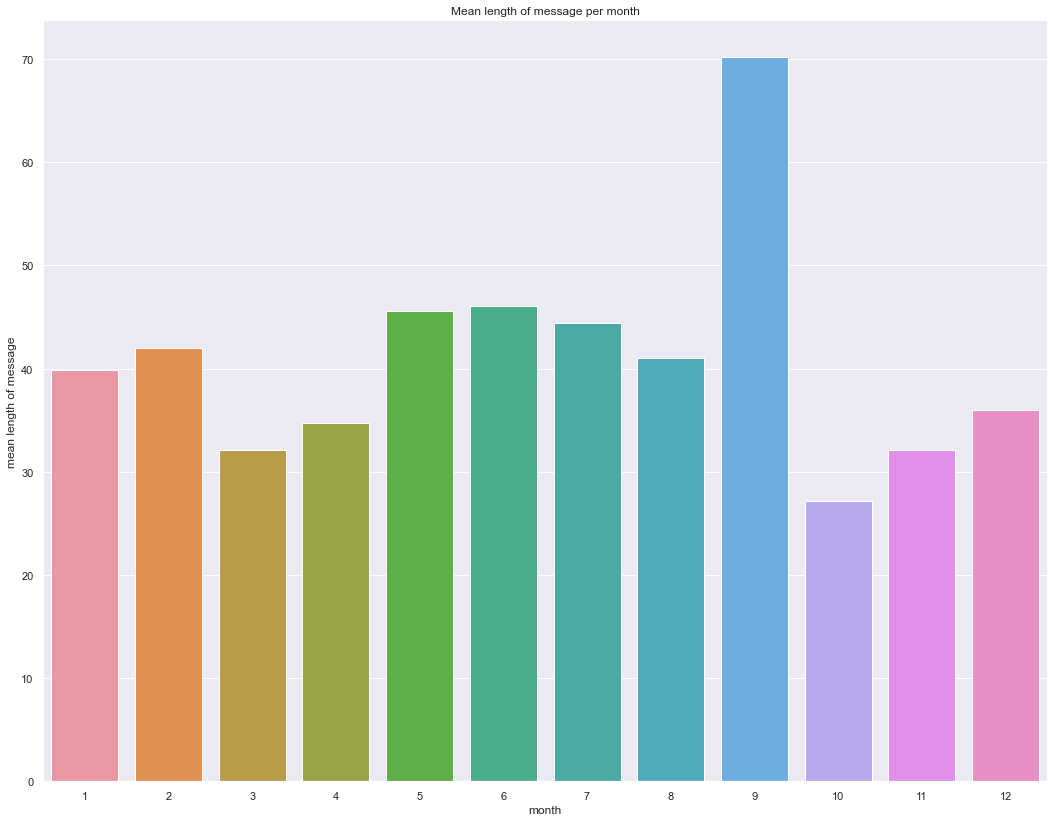

In [33]:
query2 = (df.groupby('month')['message'].apply(lambda x: np.mean(x.str.len())).reset_index(name='mean_len_message'))
query2["mean_len_message"] = query2["mean_len_message"].round(2)
plot = sns.barplot(x=query2["month"], y=query2["mean_len_message"])
plot.set(xlabel="month", ylabel="mean length of message")
plot.set_title('Mean length of message per month')
plt.show()

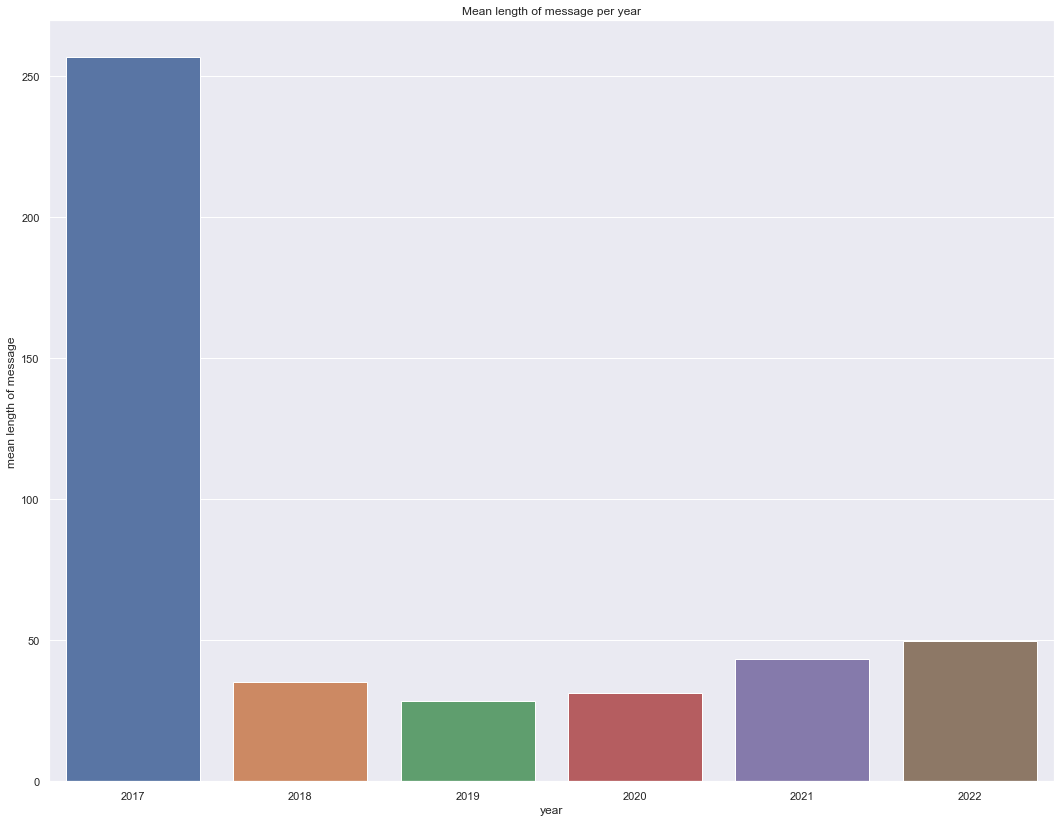

In [24]:
query3 = (df.groupby('year')['message'].apply(lambda x: np.mean(x.str.len())).reset_index(name='mean_len_message'))
query3["mean_len_message"] = query3["mean_len_message"].round(2)
plot = sns.barplot(x=query3["year"], y=query3["mean_len_message"])
plot.set(xlabel="year", ylabel="mean length of message")
plot.set_title('Mean length of message per year')
plt.show()

#### Number of messages per time

Text(0.5, 1.0, 'Number of messages per year')

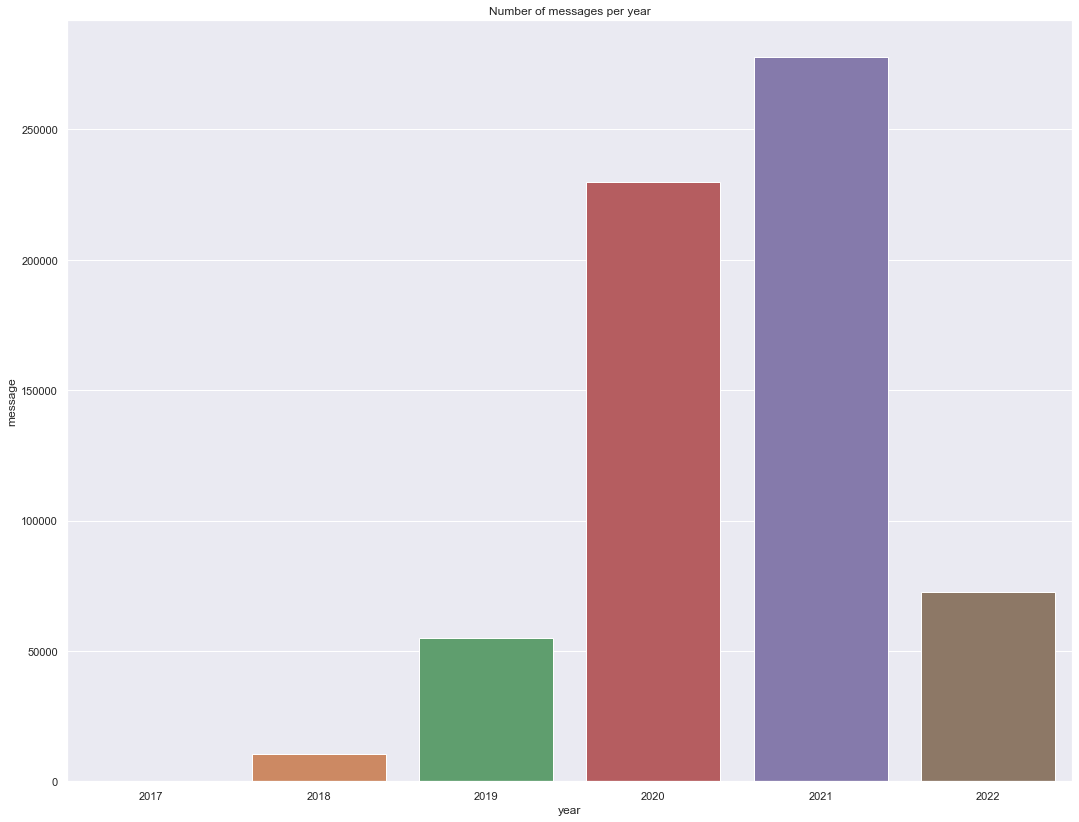

In [23]:
dt = df.groupby(['year']).count()
dt['year'] = dt.index.get_level_values(0)
sns.barplot(x="year", y="message", data=dt).set_title('Number of messages per year')

Text(0.5, 1.0, 'Number of messages per month')

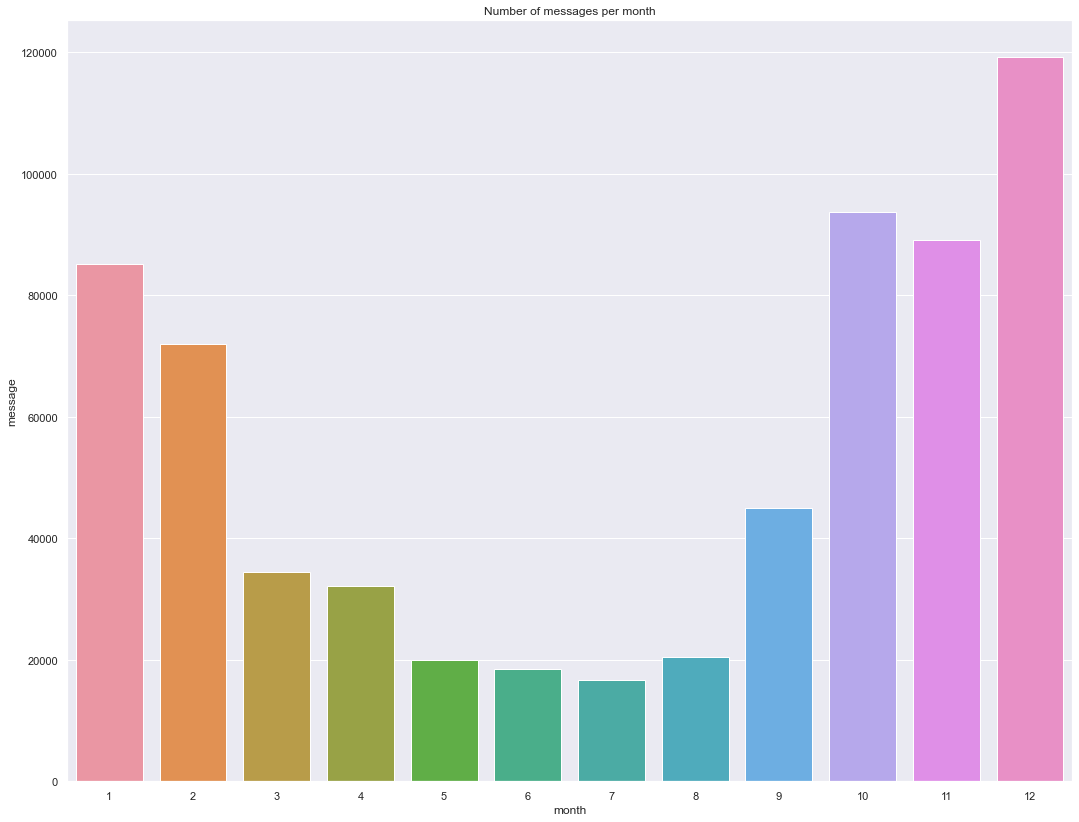

In [35]:
dt = df.groupby(['month']).count()
dt['month'] = dt.index.get_level_values(0)
sns.barplot(x="month", y="message", data=dt).set_title('Number of messages per month')

Text(0.5, 1.0, 'Number of messages per hour')

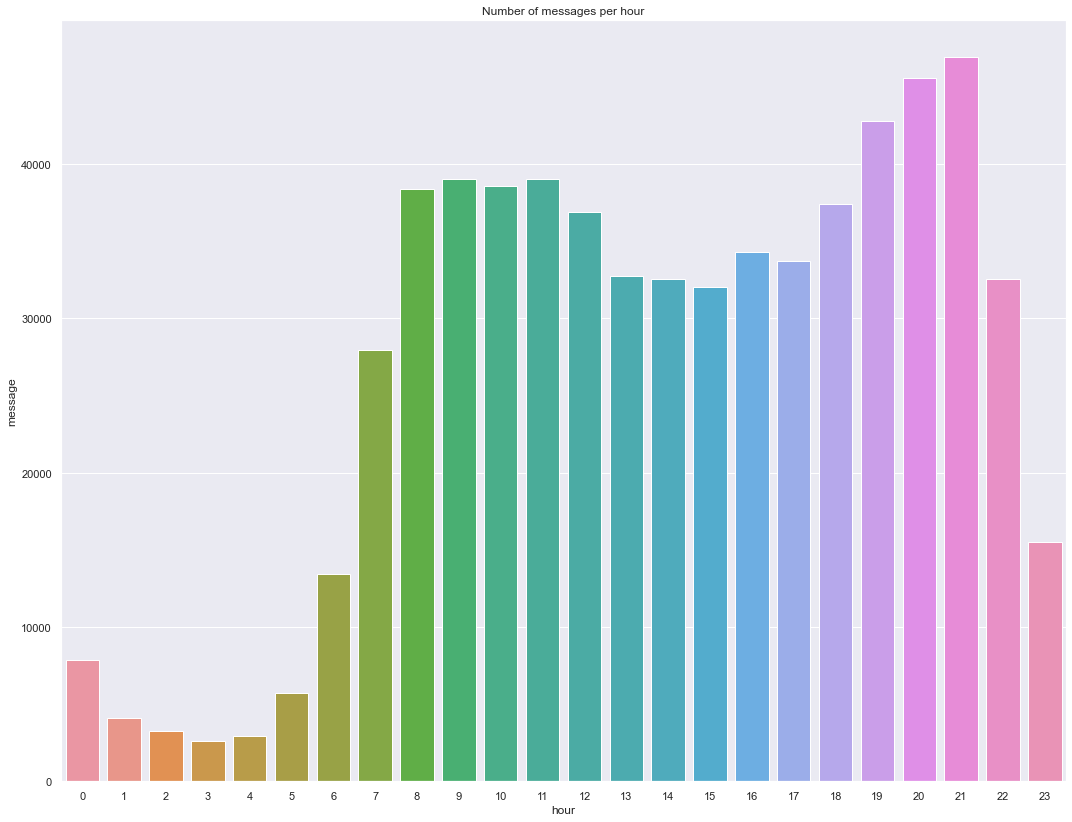

In [36]:
dt = df.groupby(['hour']).count()
dt['hour'] = dt.index.get_level_values(0)
sns.barplot(x="hour", y="message", data=dt).set_title('Number of messages per hour')

### NaN

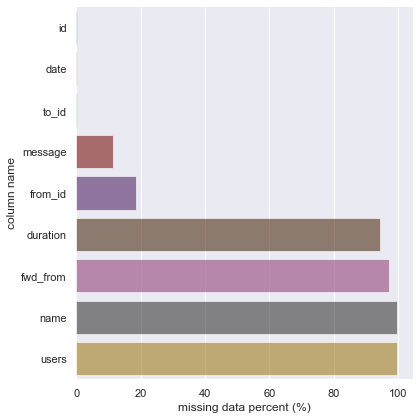

In [37]:
percent_missing = df.isnull().sum()*100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)
missing_value_df["percent_missing"] = missing_value_df["percent_missing"].round(2)
missing_value_df = missing_value_df[missing_value_df["percent_missing"] != 0.00]
plot = sns.catplot(data=missing_value_df, kind="bar", x="percent_missing", y="column_name", ci="sd", palette="dark", alpha=.6, height=6)
plot.despine(left=True)
plot.set_axis_labels("missing data percent (%)", "column name")
plt.show()

### Message type by time

In [71]:
df1['year'] = pd.DatetimeIndex(df1['date']).year
df1['month'] = pd.DatetimeIndex(df1['date']).month
df1['day'] = pd.DatetimeIndex(df1['date']).day
df1['hour'] = pd.DatetimeIndex(df1['date']).hour

df1['hour'] = df1["hour"].dropna().astype("int")
df1['day'] = df1["day"].dropna().astype("int")
df1['month'] = df1["month"].dropna().astype("int")
df1['year'] = df1["year"].dropna().astype("int")

<AxesSubplot:xlabel='type', ylabel='count'>

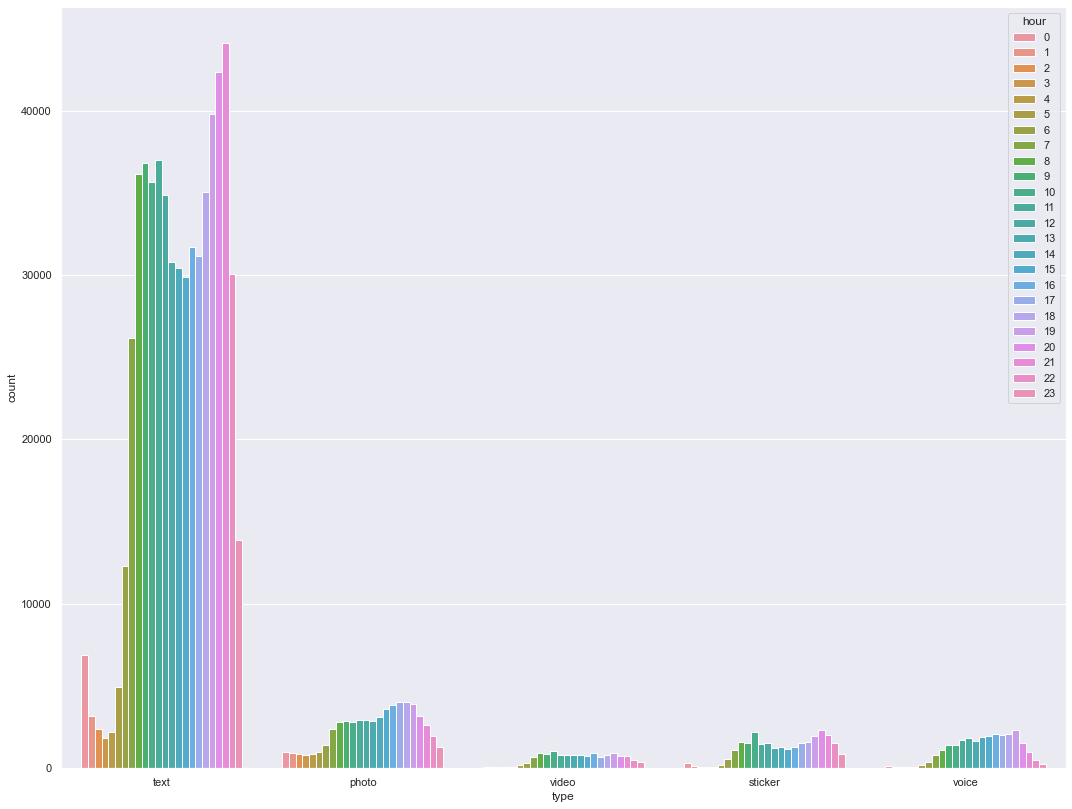

In [72]:
sns.countplot(data=df1, x='type', hue='hour')

#### Different type of messages

Text(0.5, 1.0, 'Number of messages of different types')

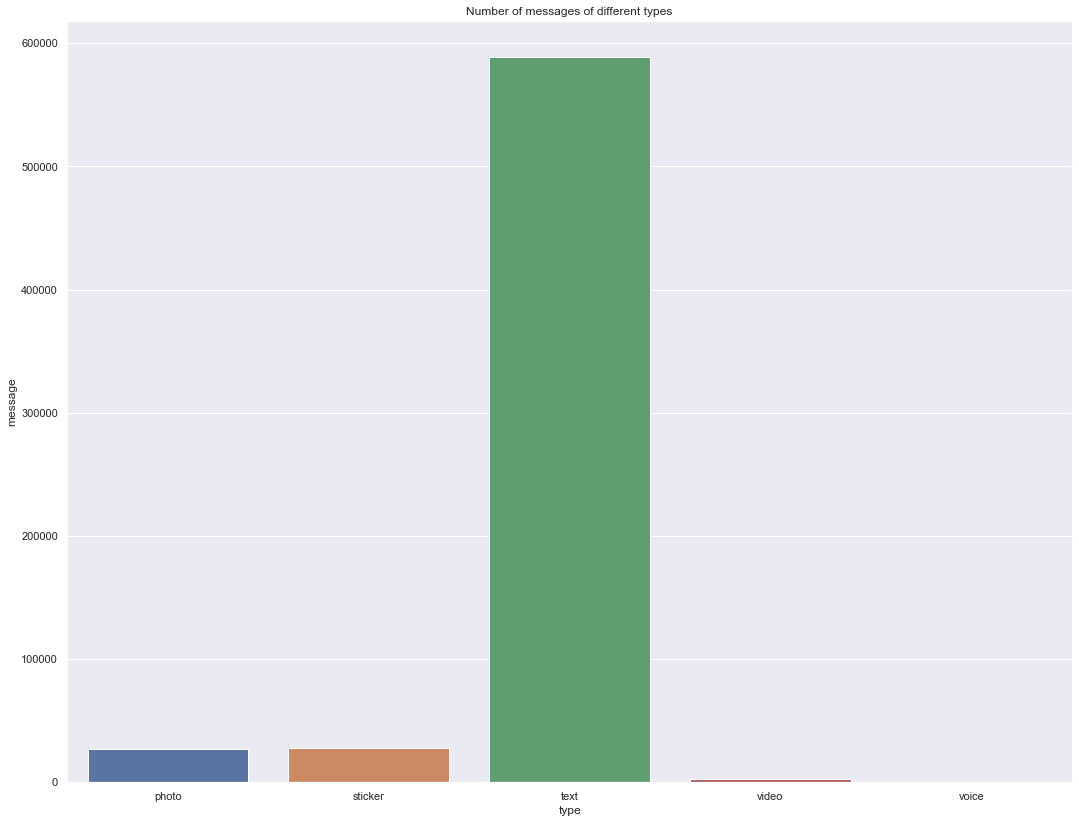

In [41]:
fr = df1.groupby(['type']).count()
fr['type'] = fr.index.get_level_values(0)
sns.barplot(x="type", y="message", data=fr).set_title('Number of messages of different types')

In [42]:
fr = df.groupby(["type"])["duration"].sum()
df.groupby(["type"])["duration"].sum()


type
Channel                 0.0
Group                   0.0
Private dialog          0.0
photo                   0.0
sticker                 0.0
text                    0.0
video             1073092.0
voice              467192.0
Name: duration, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

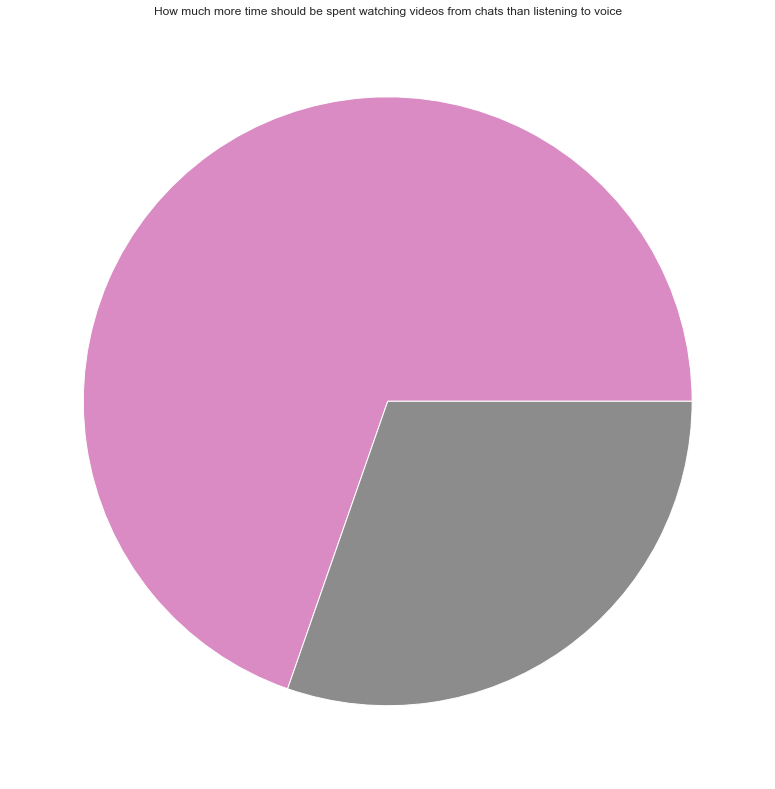

In [43]:
my_labels = ["Video", "Voice"]
plt.title('How much more time should be spent watching videos from chats than listening to voice')
plt.pie(fr)
plt.show

#### Different type of chats

Text(0.5, 1.0, 'Number of messages')

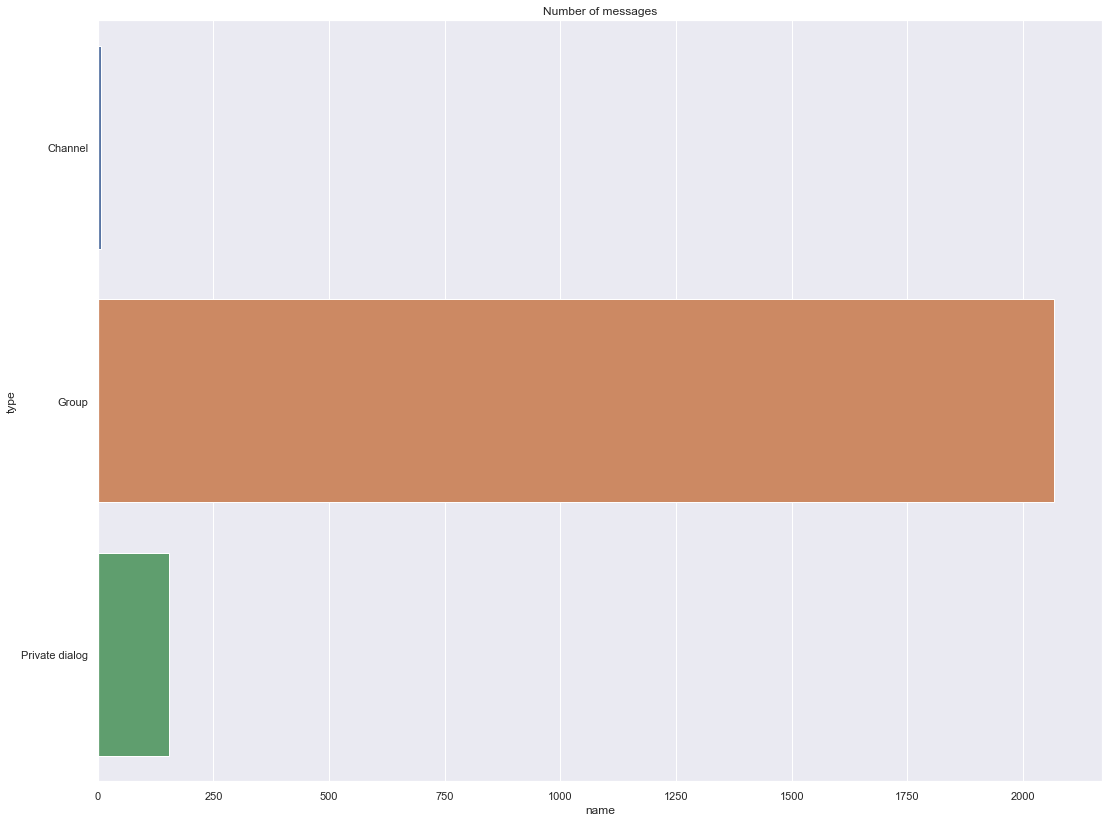

In [44]:
fr = df2.groupby(['type']).count()
fr['type'] = fr.index.get_level_values(0)
sns.barplot(x = "name", y="type", data=fr).set_title('Number of messages')

#### Which users send and receive messages most often

In [96]:
fr = df.groupby(["from_id"])["from_id"].count()
fr_sorted = fr.sort_values()
fr_sorted.tail(10)

from_id
PeerUser(user_id=372551595)      11786
PeerUser(user_id=1419351245)     12203
PeerUser(user_id=891078448)      12246
PeerUser(user_id=371105962)      13483
PeerUser(user_id=413405368)      14003
PeerUser(user_id=544701196)      14175
PeerUser(user_id=387335969)      16908
PeerUser(user_id=455550602)      17264
PeerUser(user_id=5086889948)     18997
PeerUser(user_id=564960030)     114555
Name: from_id, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

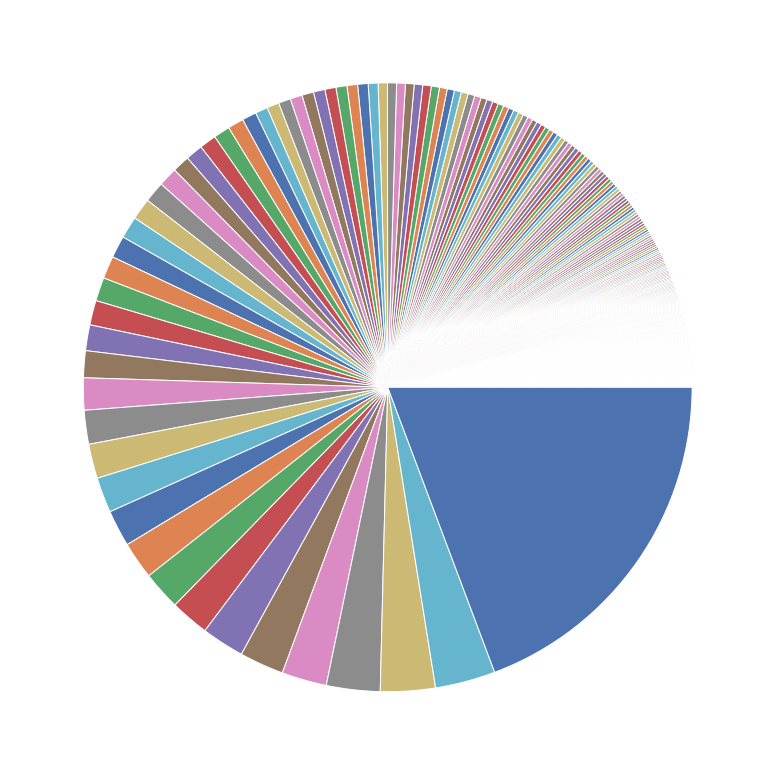

In [97]:
plt.pie(fr_sorted)
plt.show

In [100]:
top = [['user_id=455550602', 17264], ['user_id=5086889948', 18997], ['user_id=564960030', 114555]]
df_top = pd.DataFrame(top, columns = ['user id', 'number of messages'])
print(df_top)

              user id  number of messages
0   user_id=455550602               17264
1  user_id=5086889948               18997
2   user_id=564960030              114555


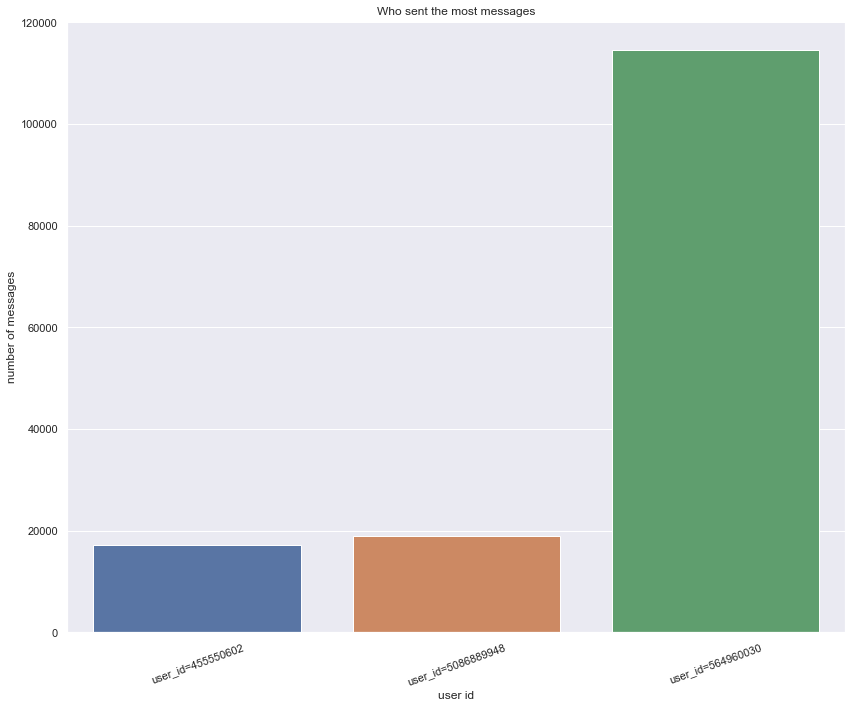

In [101]:
sns.barplot(x ="user id", y="number of messages", data=df_top).set_title('Who sent the most messages')
plt.xticks(rotation=20)
plt.tight_layout()

In [50]:
fr = df.groupby(["to_id"])["to_id"].count()
fr_sorted = fr.sort_values()
fr_sorted.tail(5)

to_id
PeerChannel(channel_id=1481887487)     48004
PeerChannel(channel_id=1213264961)     56542
PeerChannel(channel_id=1356176648)     74126
PeerChannel(channel_id=1260680685)    100000
564960030                             108817
Name: to_id, dtype: int64

In [51]:
top = [['564960030', 108817], ['channel_id=1260680685', 100000], ['channel_id=1356176648', 74126]]
df_top = pd.DataFrame(top, columns = ['user id', 'number of messages'])
print(df_top)

                 user id  number of messages
0              564960030              108817
1  channel_id=1260680685              100000
2  channel_id=1356176648               74126


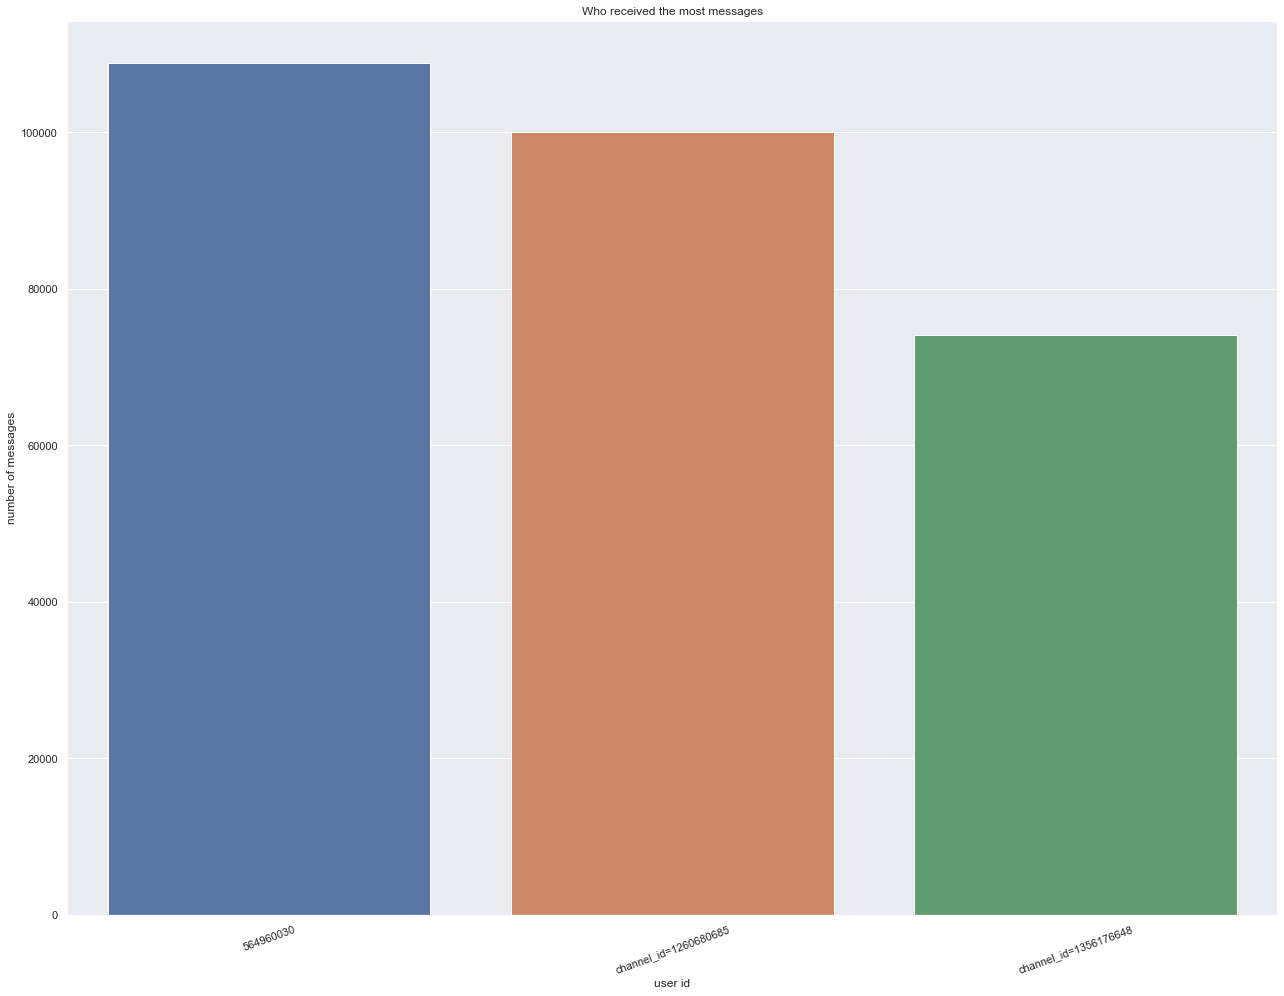

In [52]:
sns.barplot(x ="user id", y="number of messages", data=df_top).set_title('Who received the most messages')
plt.xticks(rotation=20)
plt.tight_layout()

#### Positive and negative messages

In [105]:
word1=df['message'].str.contains('щастя|радість|ура|вау|круто|чудово|чарівно|казково|хорош|крутишка|молодець|сонечко|кицю').sum()
word2=df['message'].str.contains('сум|смерть|жах|піпец|треш|вбити|суїцид|гівно|фу|сука|їбать|нахуй|блять|пізда|піздец').sum()
word3=df['message'].str.contains('так|Так|ТАК|да|Да|ДА').sum()
word4=df['message'].str.contains('ні|Ні|НІ|нет|Нет|НЕТ').sum()
print(word1, word2, word3, word4)

5416 7194 92769 36081


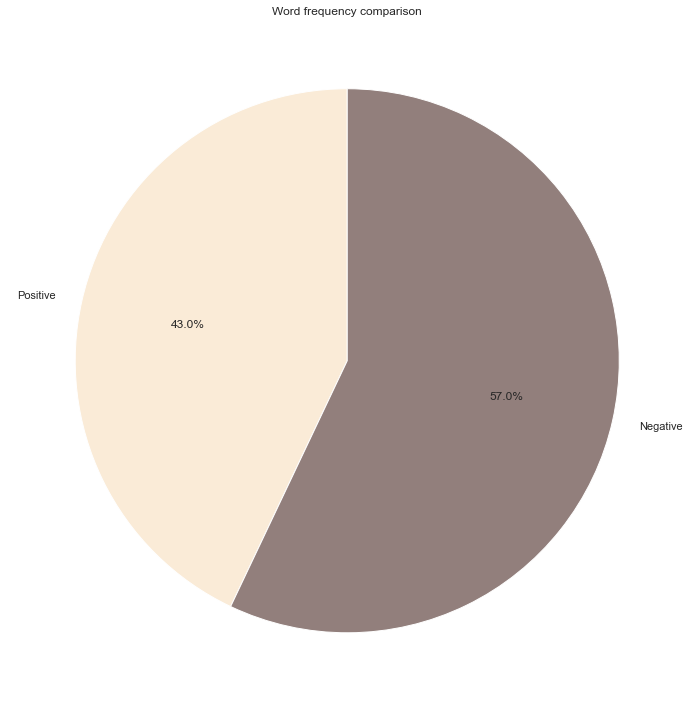

In [106]:
y = [word1, word2]
mylabels = ["Positive", "Negative"]
colors = ['#faebd7', '#927f7c']
plt.title('Word frequency comparison')
plt.pie(y, labels=mylabels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.tight_layout()
plt.show()

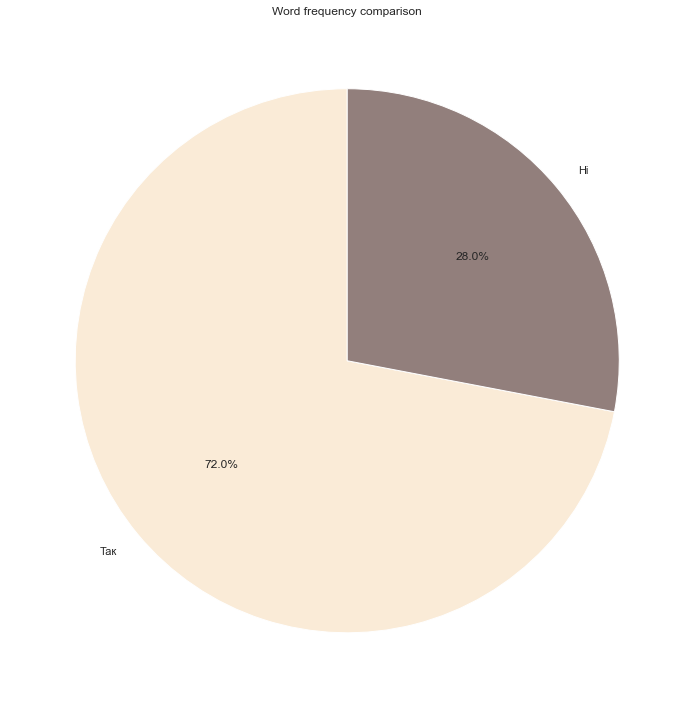

In [107]:
y = [word3, word4]
mylabels = ["Так", "Ні"]
colors = ['#faebd7', '#927f7c']
plt.title('Word frequency comparison')
plt.pie(y, labels=mylabels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.tight_layout()
plt.show()

#### My symbol smile

In [56]:
smile1=df['message'].str.contains(':3').sum()
smile2=df['message'].str.contains('<3').sum()
smile3=df['message'].str.contains('Т_Т').sum()
smile4=df['message'].str.contains('О_о').sum()
smile5=df['message'].str.contains('-_-').sum()
smile6=df['message'].str.contains(';-;').sum()
print(smile1, smile2, smile3, smile4, smile5, smile6)

1568 19 5 13 477 219


In [57]:
top = [[':3', smile1], ['<3', smile2], ['T_T', smile3], ['O_o', smile4], ['-_-', smile5], [';-;', smile6]]
df_top = pd.DataFrame(top, columns = ['symbols', 'number of times'])
print(df_top)

  symbols  number of times
0      :3             1568
1      <3               19
2     T_T                5
3     O_o               13
4     -_-              477
5     ;-;              219


Text(0.5, 1.0, 'My symbols')

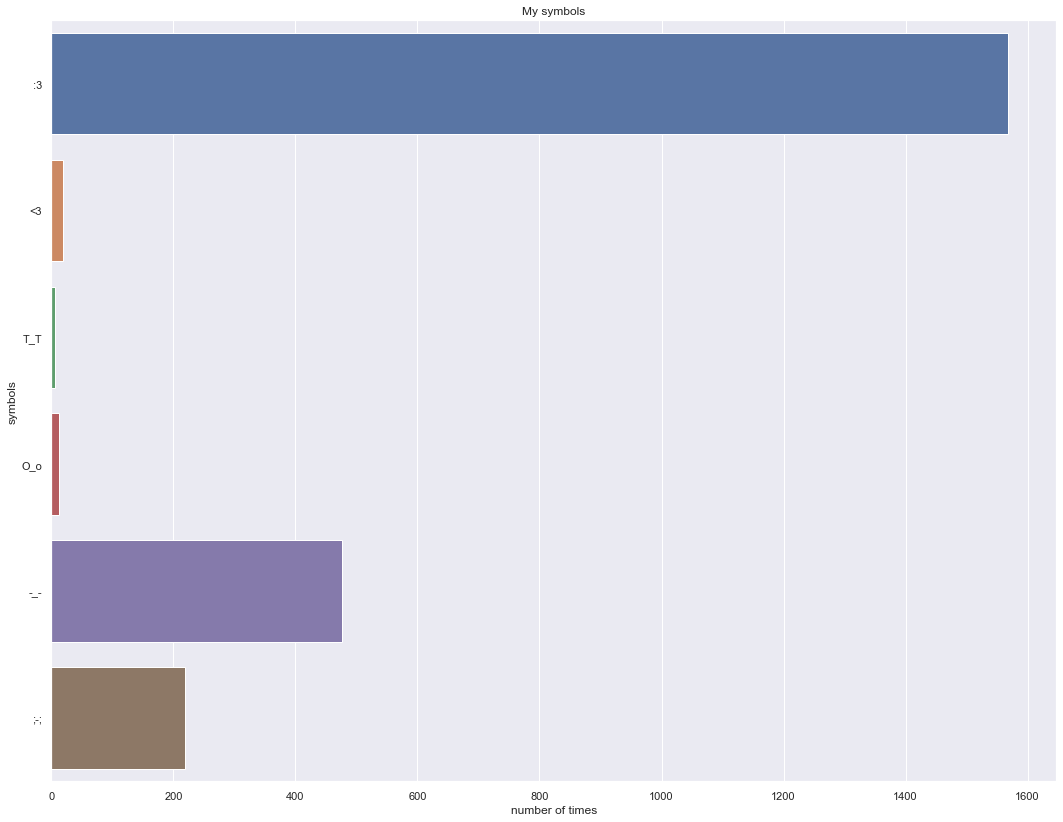

In [58]:
sns.barplot(x ="number of times", y="symbols", data=df_top).set_title('My symbols')
